In [46]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import torch
import os    
from cellpose import models


In [56]:
base = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/CELLINES_FROM_MICROSCOPE/SpikeIn-Christiane.S1b/"

files = []
for b, _, f in os.walk(base):

    for file in f:
        if "Img-000246-" in file or "Img-000513-" in file:
            files.append(os.path.join(b, file))

files.sort()
files = np.array(files).reshape(-1,3)

rgbs = []
for f in files:
    
    R = tifffile.imread(f[2])
    G = tifffile.imread(f[1])
    B = tifffile.imread(f[0])
    
    rgbs.append(np.stack((R,G,B)).transpose(1,2,0))

rgbs[0].shape

(1496, 2048, 3)

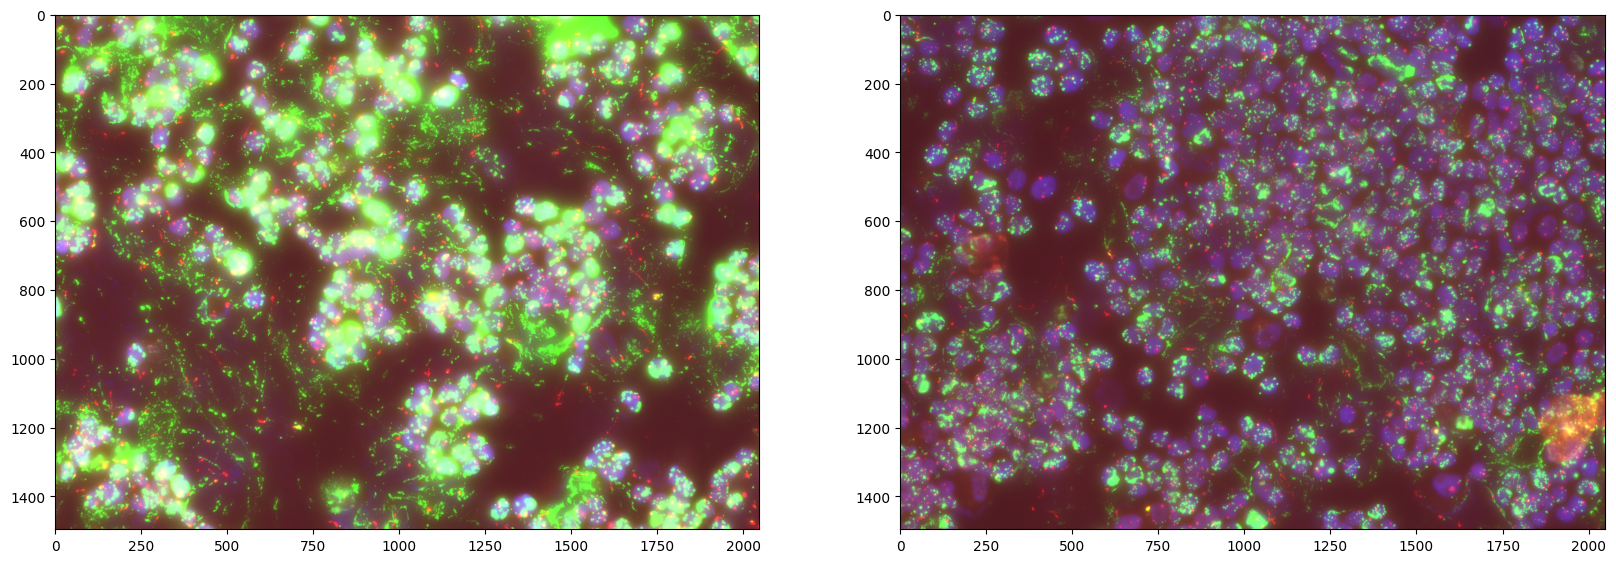

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for im, ax in zip(rgbs, axs):
    ax.imshow(im)

In [71]:
M = models.CellposeModel(model_type="CP_Added", gpu=torch.cuda.is_available())

In [72]:
masks, _, _ = M.eval(rgbs[0][...,2], diameter=55)

100%|██████████| 304/304 [00:02<00:00, 132.43it/s]


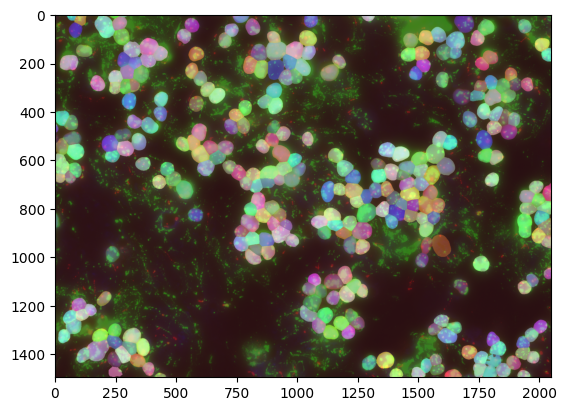

In [73]:
from FISHClass.utils.visualize import random_color_segmentation 

rc = random_color_segmentation(masks)

plt.imshow(rgbs[0])
plt.imshow(rc, alpha=0.5)